## prework

* import basic dependencies
* load data
* check data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-numpy/mnist.npz


In [2]:
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
path = '/kaggle/input/mnist-numpy/mnist.npz'
f = np.load(path)
train_images, train_labels = f['x_train'], f['y_train']
test_images, test_labels = f['x_test'], f['y_test']
f.close()

## Data Preprocessing

* reshape
* transform data type
* normalization
* label => one-hot encoding

In [4]:
from keras.utils import to_categorical

In [5]:
# reshape
X_train = X_train.reshape([60000, 784])
X_test = X_test.reshape([10000, 784])
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
# transform np data type
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [7]:
# normalization
X_train = X_train/255
X_test = X_test/255
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# one-hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

## Model

* build model
* compile, summary
* fit, evaluate

</br></br>

* advanced NN model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [10]:
# build simple model
model = Sequential()
model.add(Dense(10, input_shape=(28*28, )))
model.add(Activation('softmax'))

In [11]:
# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
# fit
model.fit(X_train, train_labels, epochs=200, batch_size=128, verbose=True, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.3710 - accuracy: 0.6764 - val_loss: 0.8889 - val_accuracy: 0.8283
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.7865 - accuracy: 0.8300 - val_loss: 0.6536 - val_accuracy: 0.8618
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 0.6391 - accuracy: 0.8510 - val_loss: 0.5591 - val_accuracy: 0.8733
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5676 - accuracy: 0.8618 - val_loss: 0.5068 - val_accuracy: 0.8798
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.8676 - val_loss: 0.4730 - val_accuracy: 0.8849
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.8728 - val_loss: 0.4490 - val_accuracy: 0.8879
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4722 - accuracy: 0.8767 - val_loss: 0.4314 - val_accuracy: 0.8892

In [13]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=True)
print('test_loss', test_loss, '\n', 'test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.9226
test_loss 0.2774392068386078 
 test_acc 0.9225999712944031


In [14]:
# advanced NN model
model = Sequential()
model.add(Dense(128, input_shape=(28*28, ),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
# compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit
model.fit(X_train, train_labels, epochs=200, batch_size=128, verbose=True, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.4314 - accuracy: 0.6388 - val_loss: 0.7210 - val_accuracy: 0.8337
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5834 - accuracy: 0.8517 - val_loss: 0.4526 - val_accuracy: 0.8838
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8847 - val_loss: 0.3728 - val_accuracy: 0.8977
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8985 - val_loss: 0.3333 - val_accuracy: 0.9069
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.9062 - val_loss: 0.3087 - val_accuracy: 0.9128
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.9124 - val_loss: 0.2891 - val_accuracy: 0.9186
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.9165 - val_loss: 0.2748 - val_accuracy: 0.9220

In [17]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=True)
print('test_loss', test_loss, '\n', 'test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9759
test_loss 0.07939136028289795 
 test_acc 0.9758999943733215


### Advanced CNN

In [18]:
# reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [19]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Conv2D, MaxPool2D, Conv2D, Flatten, Dense
from keras.optimizers import Adam

In [20]:
# build advanced advanced CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)))
# add two layers => avoid overfit
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=1)) 

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(BatchNormalization(axis=1)) 
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [21]:
# compile
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

In [22]:
# fit
model.fit(X_train, train_labels, epochs=15, batch_size=128, verbose=True, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 11ms/step - loss: 0.3431 - accuracy: 0.8961 - val_loss: 0.1491 - val_accuracy: 0.9682
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1165 - accuracy: 0.9633 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.0405 - val_accuracy: 0.9883
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0280 - val_accuracy: 0.9928
Epoch 7/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0359 - val_accuracy: 0.9900

In [23]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=True)
print('test_loss', test_loss, '\n', 'test_acc', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9936
test_loss 0.01979205571115017 
 test_acc 0.9936000108718872


### Add image_generator for data augmentation

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.10, shear_range=0.5, height_shift_range=0.10, zoom_range=0.10)
# compile model with data generator
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.optimizer.lr=0.001
batches = generator.flow(X_train, train_labels, batch_size=128)

In [26]:
# fit
%time history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=15)

Epoch 1/15
  469/60000 [..............................] - 26s 56ms/step - loss: 0.1132 - accuracy: 0.9662
CPU times: user 30 s, sys: 612 ms, total: 30.6 s
Wall time: 27.7 s


In [27]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=True)
print('test_loss', test_loss, '\n', 'test_acc', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9926
test_loss 0.0211494080722332 
 test_acc 0.9926000237464905


## 实验五

* prework
    * hyper-parameters
    * Auxiliary function 辅助函数
        * 绘制正确图像
        * 绘制错误图像

* two CNN model 两个基于Keras的CNN
    * based on model.Sequential
    * Function based model




## prework


* hyper-parameters
* auxiliary function - plot image function

In [28]:
# hyper-parameters
img_size = 28
img_size_flat = 28*28
img_shape = (28, 28)
img_shape_full = (28, 28, 1)
num_classes = 10
num_channels = 1

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# plot_some images
def plot_images(images, cls_true, cls_pred=None):
    assert len(images)==9
    assert len(cls_true)==9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = 'True:{0}'.format(cls_true[i])
        else:
            xlabel = 'True:{0}, Pred:{1}'.format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
# plot single image
def plot_image(image):
    plt.imshow(image.reshape(img_shape), interpolation='nearest', cmap='binary')
    plt.show()
    
# plot error example
def plot_example_errors(cls_pred, correct):
    incorrect = (correct==False)
    images = X_test[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = y_test[incorrect]
    # plot 0:9
    plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])

# def plot_example_errors(cls_pred, correct):
#     incorrect = (correct == False)
#     images = X_test[incorrect]
#     cls_pred = cls_pred[incorrect]
#     cls_true = y_test[incorrect]
#     plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])

## Model

* build model
* compile, summary
* fit, evaluate
* predict, plot (correctly classified, mis classified) images
* save model, load model

In [31]:
from keras.models import Sequential
from keras.layers import InputLayer, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [32]:
# model -- 实验五 -- sequential model
model = Sequential()

# build model
model.add(InputLayer(input_shape=(img_size_flat, )))
model.add(Reshape(img_shape_full))

model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [33]:
# compile
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 36)        936       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 36)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        32436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [34]:
# 由于前面 数据已经reshape成为图片维度了，
# 再输入到此model(inputlayer=(28*28, ))时候要flatten
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [35]:
model.fit(X_train, train_labels, epochs=1, batch_size=128, validation_split=1/12, verbose=True)

430/430 [==============================] - 4s 9ms/step - loss: 0.2021 - accuracy: 0.9400 - val_loss: 0.0630 - val_accuracy: 0.9824


In [36]:
# evaluate
result = model.evaluate(X_test, test_labels, verbose=True)
print('loss ', result[0])
print('acc ', result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0590 - accuracy: 0.9823
loss  0.058981817215681076
acc  0.9822999835014343


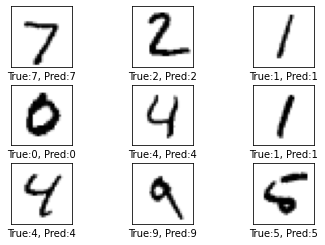

In [37]:
# predict
predict = model.predict(X_test)
predict = np.argmax(predict, axis=1)

# visualize correctly classified sample
plot_images(X_test[0:9], y_test[0:9], predict[0:9])

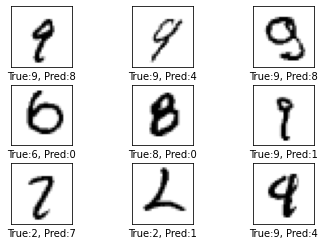

In [38]:
# visualize misclassified sample
y_pred = model.predict(X_test)
cls_pred = np.argmax(y_pred, axis=1)
correct = (cls_pred==y_test)
plot_example_errors(cls_pred, correct=correct)

In [39]:
from keras.models import Model
from keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense
from keras import backend as K

In [40]:
# model -- 实验五 -- function based model
inputs = Input(shape=(img_size_flat, ))
net = inputs
net = Reshape(img_shape_full)(net)

net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dense(num_classes, activation='softmax')(net)

outputs = net

# then use keras.models.Model to build model
model2 = Model(inputs=inputs, outputs=outputs)

In [41]:
# compile
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# summary
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)             

In [42]:
# fit
model2.fit(X_train, train_labels, batch_size=128, epochs=1, validation_split=1/12, verbose=True)

430/430 [==============================] - 3s 7ms/step - loss: 0.2035 - accuracy: 0.9379 - val_loss: 0.0589 - val_accuracy: 0.9828


In [43]:
# evaluate
result = model2.evaluate(X_test, test_labels, verbose=True)
print(model2.metrics_names[0], result[0])
print(model2.metrics_names[1], result[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0548 - accuracy: 0.9819
loss 0.05484490841627121
accuracy 0.9818999767303467


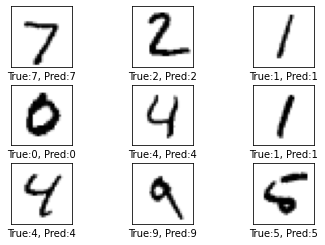

In [44]:
# predict
predict = model2.predict(X_test)
predict = np.argmax(predict, axis=1)

# visualize correctly classified sample
plot_images(X_test[0:9], y_test[0:9], predict[0:9])

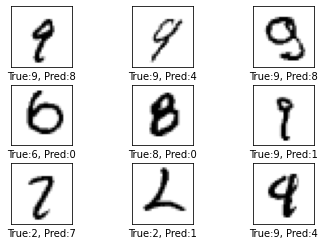

In [45]:
# visualize misclassified sample
y_pred = model.predict(X_test)
cls_pred = np.argmax(y_pred, axis=1)
correct = (cls_pred==y_test)
plot_example_errors(cls_pred, correct=correct)

save model & load model

In [46]:
from keras.models import load_model
import math

In [47]:
# save model
path_model = 'model2.pkl'
model2.save(path_model)

# del model
del model2

# load mdoel
model3 = load_model('/kaggle/working/model2.pkl')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 36)        936       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 36)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        32436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

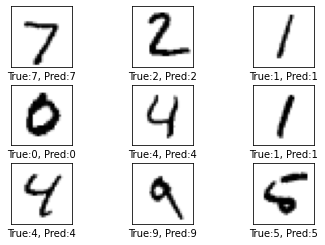

In [48]:
# predict (use loaded model)
predict = model3.predict(X_test)
predict = np.argmax(predict, axis=1)
plot_images(X_test[0:9], y_test[0:9], predict[0:9])

In [49]:
# output conv-weights layer function
def plot_conv_weights(weights, input_channel=0):
    # get params
    w_min = np.min(weights)
    w_max = np.max(weights)
    num_filters = weights.shape[3]
    
    # plot-prework
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            img = weights[:, :, input_channel, i]
            ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
# output conv-output 
def plot_conv_output(values):
    # get params
    num_filters = values.shape[3]
    
    # plot-prework
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [50]:
# summary
model3.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)             

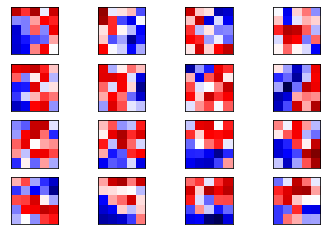

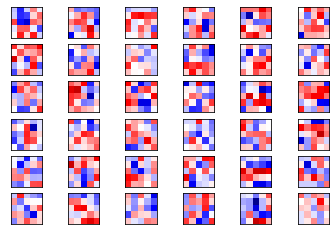

In [51]:
# get layer and output intermediate layer
# select by summary output

# get layers
layer_input = model3.layers[0]
layer_conv1 = model3.layers[2]
layer_conv2 = model3.layers[4]

# get weights
weights_conv1 = layer_conv1.get_weights()[0]
plot_conv_weights(weights=weights_conv1, input_channel=0)
weights_conv2 = layer_conv2.get_weights()[0]
plot_conv_weights(weights=weights_conv2, input_channel=0)

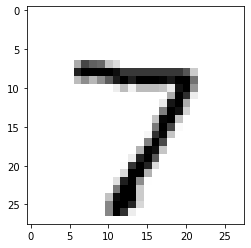

In [52]:
# input images
image1 = X_test[0]
plot_image(image1)

(1, 28, 28, 16)


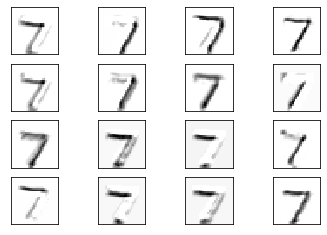

In [53]:
# output conv1 layer
output_conv1 = K.function(inputs=[layer_input.input], outputs=[layer_conv1.output])
layer_output1 = output_conv1(np.array([image1]))[0]
print(layer_output1.shape)
plot_conv_output(values=layer_output1)

(1, 14, 14, 36)


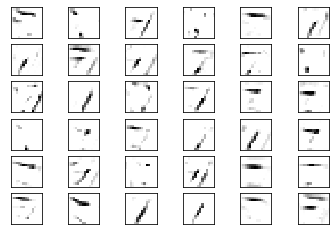

In [54]:
# output conv2 layer
output_conv2 = Model(inputs=layer_input.input, outputs=layer_conv2.output)
layer_output2 = output_conv2.predict(np.array([image1]))
print(layer_output2.shape)
plot_conv_output(values=layer_output2)